In [4]:
# Student name: 
# Student ID: 

Please fill this notebook with your code (if necessary, remove `pass` after "# your code here"), execute all cells, save the notebook on your machine. Upload the notebook (the file whose filename extension is `.ipynb`) only. Please upload to the [Math9 HW07 Dropbox](https://eee.uci.edu/toolbox/dropbox/) by the deadline indicated in the Dropbox. A primer on Dropbox is [here](https://eee.uci.edu/help/dropbox/instructors/_assets/dropbox_primer.pdf).

# Problem 1: Monte-Carlo approximation of $\pi$

Generate $N = 5000$ (or more) tuples $(x,y)$, in which each coordinate is uniformly random in the interval $(0,1)$. Estimate $\pi$ by computing the fraction of tuples that are within the circle defined by $x^2 + y^2 = 1$. Use code like this:

```
plt.figure(figsize=(5,5))
plt.scatter(X_out, Y_out, color="red")
plt.scatter(X_in,Y_in)
plt.plot(X, Y)
plt.axis([0, 1, 0, 1])
```

to generate this picture: 

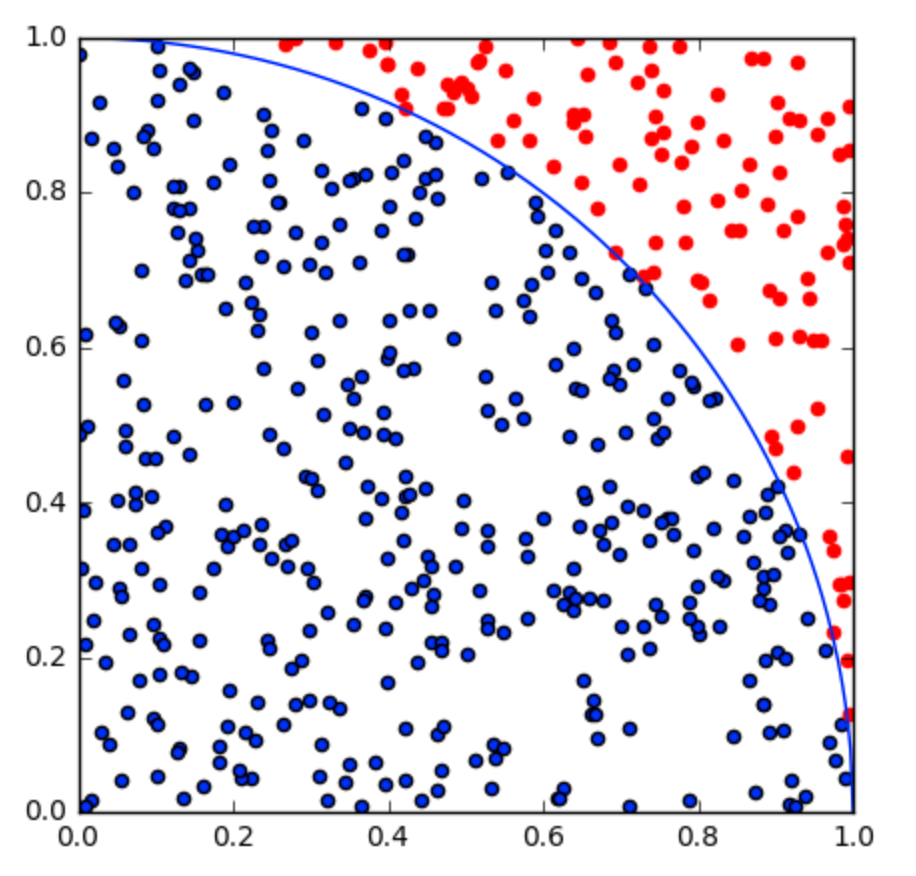

In [5]:
from IPython.display import Image, display 
display(Image('monte_carlo.png', width=300)) 



### Solution

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# your code here

# Problem 2: Law of Large Numbers and the Central Limit Theorem

Suppose we draw $n$ uniform random numbers. The average of these numbers will also be random but will have a different distribution. We want to see how the distribution of the average changes as $n$ increases.  

More precisely, let $x_1,x_2,x_2,\dots$ be drawn from the uniform distribution on the interval [0, 1], i.e. `random.random()`. Let 
$$y_n = \frac{x_1 + \dots + x_n}{n}$$ be the average. 


* Write a function `get_x()` that will return a uniform random number between 0 and 1. 
* Write a function `get_y(n)` that will return the average of $n$ random numbers picked by `get_x()`. 
* Write a function `make_hist(YY)` that will take a numpy array `YY`, make a histogram (use `normed=True` in `plt.hist(...)`) and plot the best fitting Gaussian curve to the content of YY. (You can copy the code from Lecture 20.) 
* For each of $n=1,10,100,1000,10000$, sample 1000 values of $y_n$ (using `get_y(n)`) and draw a histogram and the best fitting distribution. [To produce a sequence of histograms, you may find it useful to insert `plt.show()` into `make_hist`.]
* Print out the standard deviation of the data when $n=1$ (i.e. average of one single x; it should be 0.28). 
* For $n=1,2,\dots,100$, draw 1000 values from `get_y()` and compute the standard deviation of the data (don't draw the histogram). Then plot the standard deviation value versus $n$. Also plot, in the same graph, the function $0.28 / \sqrt{n}$.
* Write briefly why the results you got are consistent with the law of large numbers and the central limit theorem. 

### Solution

In [7]:
# your code here

# Problem 3: Polynomial regression, overfitting, and cross-validation

Consider the following synthetic data set: 

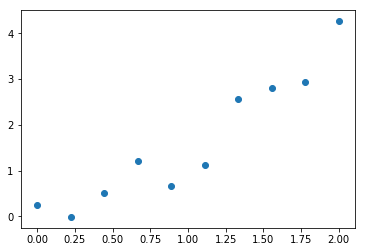

In [8]:
np.random.seed(42)
X = np.linspace(0,2,10)
Y = [x*x + np.random.normal(0,0.5) for x in X]
plt.scatter(X, Y)

Below I have created the bones of a class called `PolyFitter` that uses the built-in linear regression model in `sklearn` to fit not just a linear function but a polynomial function of any degree, e.g. $f(x) = ax^{10} + bx^9 + \dots + k$, to the data. 

**Optional**: How does the code fit to a polynomial instead of a line? Easy: it gives $x^2$, $x^3$,$\dots$ to the model as if they were extra information about the data points. Read the code below if you are curious.

In [9]:
from sklearn import linear_model

class PolyFitter():
    
    def __init__(self, degree):
        self.degree = degree
        self.model = linear_model.LinearRegression()
    
    def train(self, X, Y):
        X_aug = self._augment_input_(X)
        self.model.fit(X_aug, Y)

    def predict(self, X):
        X_aug = self._augment_input_(X)
        return self.model.predict(X_aug)
    
    def _augment_input_(self, X):
        N = X.shape[0]
        k = self.degree
        X_aug = np.zeros([N,k])
        X_aug[:,0] = X[:]
        for i in range(1,k):
            X_aug[:, i] = X * X_aug[:, i-1]
        return X_aug
    
    def plot(self, X, Y):
        XX = np.linspace(-2,5,600)
        YY = self.predict(XX)
        plt.scatter(X, Y, alpha=0.2)
        plt.axis([-0.3,2.2,-1,5])
        plt.plot(XX,YY,"r")
        plt.show()
        
    def mean_squared_error(self, X,Y):
        # your code here (see instructions below)
        # you should be using the predict function above
        pass

Here is how to use `PolyFitter`:

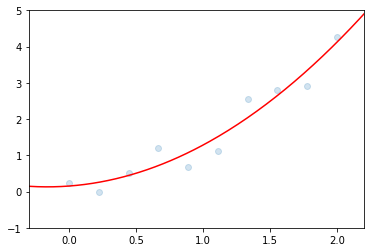

In [10]:
model = PolyFitter(2)
model.train(X, Y)
model.plot(X, Y)

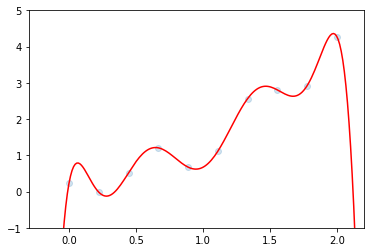

In [11]:
model = PolyFitter(10)
model.train(X, Y)
model.plot(X, Y)

As you can see, picking a high degree polynomial fits the data much more precisely at certain points. But clearly, this high-degree approximation is not really capturing the essence of this data-set. 

Your job is:

* Write the `mean_squared_error(X, Y)` function in the class. It should return the average of the square of the difference between the model's predictions (obtained using `self.predict(X)`) and the given answers `Y`. This will allow us to see how our model is doing.

* Split the data into 75% training examples and 25% test examples. (You don't need to shuffe the data, just split it). More precisely, from `X` and `Y`, make four numpy arrays: `X_train`, `Y_train`, `X_test` and `Y_test`. The training arrays should contain the $x$ and $y$ coordinates of 75% of data-points while the test arrays should contain the remaining 25%. We will use the training pair to train the model, and the test pair to see how our model is doing on data that it has not seen before (the test data). This is a standard method for avoiding the mistake of making models that work really well during development, but then work very badly when they see data they have never seen before.
    
* For each degree $d = 1,2,\dots,10$: train a `model = PolyFitter(d)` with the data `X_train`, `Y_train`; compare the fitted curve with the data using `model.plot()`; compute its mean squared error on the training set `X_train`, `Y_train`; compute its mean squared error on the test data-set `X_test`, `Y_test`. 

* Plot the *training errors* and *test errors* computed above as a function of $d=1,\dots,10$.  

You should notice that as the degree increases, the training error goes down a lot, which means that our model is becoming very good at fitting to the training data. But, for the test data, it gets worse and worse. What's the best degree for this data-set?  



### Solution

In [12]:
# your code here